In [98]:
water = pickle.load(open("water.pickle", "rb"))
print(water)
type(water)

[('ˈskwɝːɾəl', 'water'), ('ˈwɔːɹtɔːɹɾəl', 'water'), ('ˈblæstɔɪs', 'water'), ('ˈsaɪdʌk', 'water'), ('ˈɡɔːldʌk', 'water'), ('ˈpɑːliːwæɡ', 'water'), ('ˈpɑːliːwɝːl', 'water'), ('ˈpɑːliːɹæθ', 'water'), ('ˈtɛntəkuːl', 'water'), ('ˈtɛntəkɹuːl', 'water'), ('ˈsloʊpoʊk', 'water'), ('ˈsloʊbɹoʊ', 'water'), ('ˈsiːl', 'water'), ('ˈduːɡɑːŋ', 'water'), ('ˈʃɛldɚ', 'water'), ('ˈklɔɪstɚ', 'water'), ('ˈkɹæbiː', 'water'), ('ˈkɪŋlɚ', 'water'), ('ˈhɔːɹsiː', 'water'), ('ˈsiːdɹə', 'water'), ('ɡɔːlˈdiːn', 'water'), ('ˈsiːkɪŋ', 'water'), ('ˈstɑːɹjuː', 'water'), ('ˈstɑːɹmiː', 'water'), ('ˈtɔːɹoʊs', 'water'), ('ˈmædʒɪkɑːɹp', 'water'), ('ˈɡɛɹədoʊs', 'water'), ('ˈlæpɹəs', 'water'), ('veɪˈpɔːɹiːɑːn', 'water'), ('ˈɑːmənɑɪt', 'water'), ('ˈɑːməstɑːɹ', 'water'), ('kəˈbuːtoʊ', 'water'), ('ˈkɑːbuːtɑːps', 'water'), ('ˈtoʊɾədaɪl', 'water'), ('ˈkɹɑːkənɑː', 'water'), ('fɚˈæləɡeɪɾɚ', 'water'), ('ˈtʃɪntʃaʊ', 'water'), ('ˈlæntɚn', 'water'), ('ˈmɛɹəl', 'water'), ('əˈzuːməɹɪl', 'water'), ('ˈpɑːliːtoʊd', 'water'), ('ˈwuːpɚ', 'water'

list

In [96]:
water = [(pokemon, 'water') for pokemon in pokemon[pokemon.Types.str.contains("Water")]["IPA"]]
len(water)
pickle.dump(water, open("water.pickle", "wb"))  # save it into a file named save.p
#type(pre)

<h1><center>Lecture 20:<br>Text Classification<br></center></h1><h2><center>Thursday Mar 23 2023<br></center></h2>


<center><img src="https://pbs.twimg.com/media/DeFfQbQVwAAt10n?format=jpg&name=large" width=600 height=600 /></center>

# Updates

## Today: Naïve Bayes continued.
* Reading: J&M Chp 4 Intro - Sec 4.2
* Quiz 10 due tomorrow (Friday) - Naïve Bayes
* Final Project topic by next Tuesday
    * Talk to me or email me!

## Next week: Part of Speech tagging
* Reading: J&M Chp 8 Intro, Secs 8.1, 8.2, 8.3


### Questions, comments, concerns?

# Naïve Bayes
* Let's review what we learned last class:
* Can you summarize what the figure here is showing us?
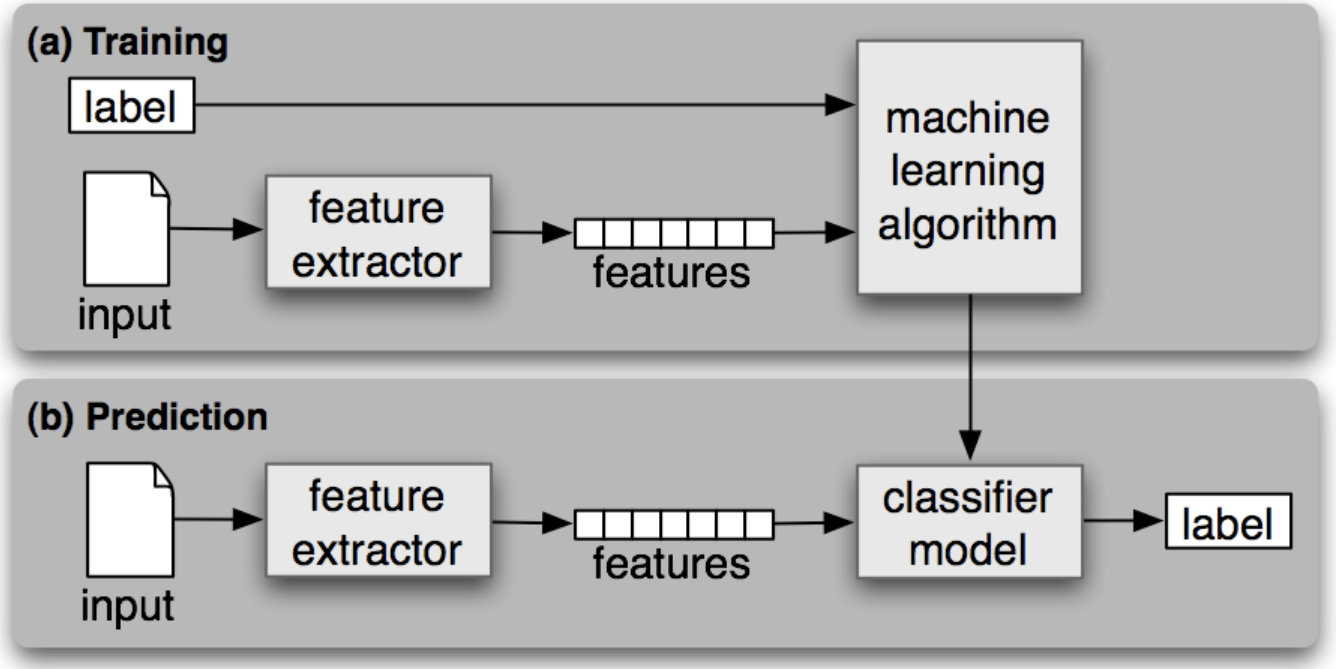

# Let's practice with Pokémonastics!

* What is **Pokémonastics**?
    * A rather popular (and surprisingly large) subfield of research in linguistics
    * Sound symbolism
    * People share intuitions about what names match different Pokémon

## For example...(Kawahara et. al 2018)

* Which of the following figures is more likely to be called _takete_ and which is more likely to be called _maluma_?

<center><img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6159826/bin/pho-0075-0219-g01.jpg" width=600 height=600 /></center>

* Which of the following figures is more likely to be called _bouba_ and which is more likely to be called _kiki_?


<center><img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6159826/bin/pho-0075-0219-g01.jpg" width=600 height=600 /></center>

## Let's look at some Pokémon data.

* Download the Pokémon corpus "pokemon.csv" from Canvas
* A more detailed version is available at https://lingbuzz.net/lingbuzz/007137 (credit to Andrew Lamont)
    * Contains 1008 Pokémon:
        - Pokédex number
        - Name in English, Japanese, French, Spanish, German, Italian, Korean, and Mandarin
        - Phonological transcription of English
        - What each Pokémon evolves from/into
        - Its evolution level
        - Whether it is a baby or a legendary Pokémon
        - Its types
        - Weight, height, and in-game statistics

In [99]:
# First, let's create our text of dark and flying Pokémon.
dark = pickle.load(open("dark.pickle", "rb"))
water = pickle.load(open("water.pickle", "rb"))
text = dark + water
len(text)

238

In [100]:
# And shuffle randomly
import random
random.shuffle(text) # random.shuffle() allows us to randomize a list
print(text)

[('ˈloʊkɪks', 'dark'), ('ˈʃɛlɑːs', 'water'), ('ˈkwækswɛl', 'water'), ('ˈsloʊpoʊk', 'water'), ('ˌɛrəˈkuːdə', 'water'), ('kɑːɹˈvɑːnə', 'dark'), ('ˈbwiːzəl', 'water'), ('ˈkwæɡsaɪɚ', 'water'), ('ˈlaɪpɚd', 'dark'), ('ˈmændɪbʌz', 'dark'), ('ˈdɹækəvɪʃ', 'water'), ('vəˈluːzə', 'water'), ('ˈɝʃiːfuː', 'water'), ('ˈkɹɑːkənɑː', 'water'), ('ˈskɹɛlp', 'water'), ('ˌmaɪtiːˈjɛnə', 'dark'), ('kiːŋˈɡæmbɪt', 'dark'), ('ˈʃɪftɹiː', 'dark'), ('taɪˈɹænətɑːɹ', 'dark'), ('ˈtoʊɾədaɪl', 'water'), ('ˈklɔɪstɚ', 'water'), ('ˈtɔːɹoʊs', 'water'), ('ˈsɝːskɪt', 'water'), ('ˌtɑːtsuːɡɪɹiː', 'water'), ('miːˈaʊθ', 'dark'), ('ˈmɑːɹʃtɑːmp', 'water'), ('ˈduwɑːt', 'water'), ('əˌloʊməˈmoʊlə', 'water'), ('ˈpɑːliːtoʊd', 'water'), ('ˈkɹɑːkoʊɹɑːk', 'dark'), ('ˈkɹʊkoʊdaɪl', 'dark'), ('ˌpuːtʃiːˈjɛnə', 'dark'), ('tʃiːˈjuː', 'dark'), ('ˈfiːbæs', 'water'), ('ɪnˈsɪnəɹɔːɹ', 'dark'), ('ˈbɹʌksɪʃ', 'water'), ('ˈkɛldiːoʊ', 'water'), ('ˈpæŋɡɚoʊ', 'dark'), ('ˌaɪɹn ˈdʒʌɡjuːləs', 'dark'), ('ˈpæləfɪn', 'water'), ('zɪɡzəˈɡuːn', 'dark'), ('ˌbɹuːt ˈbɑ

In [101]:
vdobs = ["b","d", "g", "v", "z", "ʒ"]
def voiced_obs(pokemon):
    num = pokemon.count("b") + pokemon.count("d") + pokemon.count("g") + pokemon.count("v") + pokemon.count("z") + pokemon.count("ʒ")
    return {'VdObs': num}

In [111]:
vdobs = ["b","d", "g", "v", "z", "ʒ"]
def voiced_initial(pokemon):
    return {'initialVd': pokemon[0] in vdobs}

In [113]:
featuresets = [(voiced_initial(pokemon), types) for (pokemon, types) in text]

print(featuresets[:5])

[({'initialVd': False}, 'dark'), ({'initialVd': False}, 'water'), ({'initialVd': False}, 'water'), ({'initialVd': False}, 'water'), ({'initialVd': False}, 'water')]


In [114]:
# Now we need a training set
train_set = featuresets[:100]

In [115]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [116]:
# Let's see what our classifier will say!
classifier.classify(voiced_obs('pigeotto'))

'water'

In [117]:
# Now let's test on "unseen" Pokemon
test_set = featuresets[100:]

In [118]:
print(nltk.classify.accuracy(classifier, test_set))

0.6739130434782609


In [119]:
classifier.show_most_informative_features(5)

Most Informative Features
               initialVd = True             dark : water  =      1.3 : 1.0
               initialVd = False           water : dark   =      1.0 : 1.0


In [122]:
def vd_obs(pokemon):
    features = {}
    features["initial"] = pokemon[0]
    features["final"] = pokemon[-1]
    return features

In [123]:
featuresets = [(vd_obs(pokemon), types) for (pokemon, types) in text]

print(featuresets[:5])

[({'initial': 'ˈ', 'final': 's'}, 'dark'), ({'initial': 'ˈ', 'final': 's'}, 'water'), ({'initial': 'ˈ', 'final': 'l'}, 'water'), ({'initial': 'ˈ', 'final': 'k'}, 'water'), ({'initial': 'ˌ', 'final': 'ə'}, 'water')]


In [124]:
# Now we need a training set
train_set = featuresets[:100]

In [125]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [127]:
# Let's see what our classifier will say!
classifier.classify(vd_obs('pigeotto'))

'dark'

In [128]:
# Now let's test on "unseen" Pokemon
test_set = featuresets[100:]

In [129]:
print(nltk.classify.accuracy(classifier, test_set))

0.6159420289855072


In [130]:
classifier.show_most_informative_features(5)

Most Informative Features
                 initial = 'ˌ'              dark : water  =      2.1 : 1.0
                   final = 'n'              dark : water  =      2.0 : 1.0
                   final = 'ʃ'             water : dark   =      1.9 : 1.0
                 initial = 'ˈ'             water : dark   =      1.7 : 1.0
                 initial = 'w'              dark : water  =      1.6 : 1.0


In [31]:
import pandas # This allows us to look at spreadsheets (.csv files)

# reading the CSV file
pandas.read_csv('pokemon.csv')

,Name,IPA,Evolution,Types,Weight_lb,Height_in,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Power
0,Bulbasaur,ˈbʊlbəsɔːɹ,pre,"['Grass', 'Poison']",15.2,28,45,49,49,65,65,45,318
1,Ivysaur,ˈaɪviːsɔːɹ,post,"['Grass', 'Poison']",28.7,39,60,62,63,80,80,60,405
2,Venusaur,ˈviːnəsɔːɹ,post,"['Grass', 'Poison']",220.5,79,80,82,83,100,100,80,525
3,Charmander,ˈtʃɑːɹmændɚ,pre,['Fire'],18.7,24,39,52,43,60,50,65,309
4,Charmeleon,tʃɑːɹˈmiːljən,post,['Fire'],41.9,43,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,Chi-Yu,tʃiːˈjuː,pre,"['Dark', 'Fire']",10.8,16,55,80,80,145,120,100,580
1004,Roaring Moon,ˌɹɔɹiŋ ˈmuːn,pre,"['Dragon', 'Dark']",837.8,79,105,139,71,55,101,119,590
1005,Iron Valiant,ˌaɪɹn ˈvæljənt,pre,"['Fairy', 'Fighting']",77.2,55,74,130,90,120,60,116,590
1006,Koraidon,kɔːɹˈaɪdɑːn,pre,"['Fighting', 'Dragon']",668.0,98,100,135,115,85,100,135,670


In [32]:
# Let's save that to a variable
pokemon = pandas.read_csv("pokemon.csv")

## Remember what we need for supervised learning:
* **Input:**
    * Text: <span style="color: blue;">Pokémon names</span>
    * Set of classes/categories: ?
    * Training set of hand-labeled texts: ?

* **Output:**
    * A learned classifier: ?

In [23]:
pokemon[pokemon.Evolution == 'pre']

,Name,IPA,Evolution,Types,Weight_lb,Height_in,HP,Attack,Defense,Special Attack,Special Defense,Speed,Total Power
0,Bulbasaur,ˈbʊlbəsɔːɹ,pre,"['Grass', 'Poison']",15.2,28,45,49,49,65,65,45,318
3,Charmander,ˈtʃɑːɹmændɚ,pre,['Fire'],18.7,24,39,52,43,60,50,65,309
6,Squirtle,ˈskwɝːɾəl,pre,['Water'],19.8,20,44,48,65,50,64,43,314
9,Caterpie,ˈkæɾɚpiː,pre,['Bug'],6.4,12,45,30,35,20,20,45,195
12,Weedle,ˈwiːdəl,pre,"['Bug', 'Poison']",7.1,12,40,35,30,20,20,50,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Glimmet,ˈɡlɪmət,pre,"['Rock', 'Poison']",17.6,28,48,35,42,105,60,60,350
970,Greavard,ˈɡɹiːvɑːɹd,pre,['Ghost'],77.2,24,50,61,60,30,55,34,290
973,Cetoddle,səˈtɑːdəl,pre,['Ice'],99.2,47,108,68,45,30,40,43,334
995,Frigibax,ˈfɹɪdʒɪbæks,pre,"['Dragon', 'Ice']",37.5,20,65,75,45,35,45,55,320


In [18]:
fairy = "fairy" in pokemon["Types"]
pokemon["Types"].value_counts()

['Water']                                            73
['Normal']                                           66
['Grass']                                            44
['Psychic']                                          38
['Electric']                                         32
                                                     ..
['Ghost', 'Dark']                                     1
['Bug', 'Grass', 'Bug', 'Ground', 'Bug', 'Steel']     1
['Normal', 'Water']                                   1
['Water', 'Steel']                                    1
['Fighting', 'Dragon']                                1
Name: Types, Length: 250, dtype: int64

In [23]:
# Set of classes
pokemonEvolve = ([(pokemon, 'pre') for pokemon in pokemon[pokemon.Evolution == 'pre']["IPA"]] +
                 [(pokemon, 'post') for pokemon in pokemon[pokemon.Evolution == 'post']["IPA"]])

#print(pokemonStatus[:5])
#print(pokemonStatus[-5:])

In [11]:
import random
random.shuffle(pokemonEvolve) # random.shuffle() allows us to randomize a list
print(pokemonEvolve)

[('ˈkɹɑːkənɑː', 'post'), ('ˈkwæɡsaɪɚ', 'post'), ('ˈvɪɡɚɑːθ', 'post'), ('ɪˈlɛktɹoʊd', 'post'), ('ˈhoʊnɛdʒ', 'pre'), ('ˈkɝːliːə', 'post'), ('ʃiːˈnɑːtɪk', 'post'), ('ˈɹæɾɪkeɪt', 'post'), ('ˈslækɑːθ', 'pre'), ('ˈlɪtwɪk', 'pre'), ('ˈfɪnɪzən', 'pre'), ('ˈtʃɑːɹɪzɑːɹd', 'post'), ('ˈɡɑːsəflɚ', 'pre'), ('ˈfɹækʃɚ', 'post'), ('ˈniːdoʊɹæn (ˈmeɪl)', 'pre'), ('ˈtɪmpɔːl', 'pre'), ('ˈbʌɾɚfɹiː', 'post'), ('ˈlaʊdɹɛd', 'post'), ('miˈaʊstɪk', 'post'), ('pɪɡˈnaɪt', 'post'), ('ˈhaʊnduːm', 'post'), ('ˈɛldəɡɑːs', 'post'), ('ˈhuːtˌhuːt', 'pre'), ('ˈbæskjuːlɪn', 'pre'), ('ˈɹaʊlət', 'pre'), ('ˈwuːluː', 'pre'), ('ˈdʌbwʊl', 'post'), ('ˈvaɪːkəvɔːlt', 'post'), ('ˈtaɪɹʌnt', 'pre'), ('ˈdʒɪŋks', 'post'), ('ˈswɑːnə', 'post'), ('ˈsɑːbəl', 'pre'), ('ˈloʊkɪks', 'post'), ('ˈʃiːldɑːn', 'pre'), ('ˈswɑːbluː', 'pre'), ('ˌsʌnˈflɔːɹə', 'post'), ('ˈdʒɔːltɪk', 'pre'), ('ˈdɹæɡənɛɹ', 'post'), ('ˈnɑːktaʊl', 'post'), ('ˈpɔːɹiːɡɑːn', 'pre'), ('ˈhwɪskæʃ', 'post'), ('ˈtʃɪŋlɪŋ', 'pre'), ('ˈɛɹɑːn', 'pre'), ('ˈkɹɪkətuːn', 'post'), ('ˈskoʊvɪlə

## Remember what we need for supervised learning:
* **Input:**
    * Text: <span style="color: blue;">Pokémon names</span>
    * Set of classes/categories: <span style="color: blue;">Pre-evolution, post-evolution</span>
    * Training set of hand-labeled texts: ?

* **Output:**
    * A learned classifier: ?

In [12]:
def pokemon_VObs(pokemon):
    VObs = ["b", "d", "g", "v", "z", "ʒ"]
    count = 0
    for char in pokemon:
        if char in VObs:
            count = count + 1
    if count >= 2:
        VObsMany = True
    if count < 2:
        VObsMany = False
    return {'VObs': VObsMany}

In [13]:
# Let's make a feature set with our classes (pre and post-evolution)
featuresets = [(pokemon_VObs(pokemon), evolve) for (pokemon, evolve) in pokemonEvolve]

print(featuresets[:5])
print(pokemonEvolve[:5])

[({'VObs': False}, 'post'), ({'VObs': False}, 'post'), ({'VObs': False}, 'post'), ({'VObs': False}, 'post'), ({'VObs': True}, 'pre')]
[('ˈkɹɑːkənɑː', 'post'), ('ˈkwæɡsaɪɚ', 'post'), ('ˈvɪɡɚɑːθ', 'post'), ('ɪˈlɛktɹoʊd', 'post'), ('ˈhoʊnɛdʒ', 'pre')]


In [14]:
# Now we need a training set
train_set = featuresets[:500]

## Remember what we need for supervised learning:
* **Input:**
    * Text: <span style="color: blue;">Pokémon names</span>
    * Set of classes/categories: <span style="color: blue;">Pre-evolution, post-evolution</span>
    * Training set of hand-labeled texts: <span style="color: blue;">Number of voiced obstruents</span>

* **Output:**
    * A learned classifier: ?

In [15]:
# Output: Naive Bayes Classifier
import nltk
classifier = nltk.NaiveBayesClassifier.train(train_set)

## Remember what we need for supervised learning:
* **Input:**
    * Text: <span style="color: blue;">Pokémon names</span>
    * Set of classes/categories: <span style="color: blue;">Pre-evolution, post-evolution</span>
    * Training set of hand-labeled texts: <span style="color: blue;">Number of "t" and "p"</span>

* **Output:**
    * A learned classifier: <span style="color: blue;">Built-in Naïve Bayes classifier from NLTK</span>

In [17]:
# Let's see what our classifier will say!
classifier.classify(pokemon_VObs('pigeotto'))

'post'

In [18]:
# Now let's test on "unseen" Pokemon
test_set = featuresets[500:]

In [19]:
print(nltk.classify.accuracy(classifier, test_set))

0.5772870662460567


## As a group...
Look for features about your Pokémon that might be predictable given their name. Try to come up with at least three.
   * Hint: Look at the _sounds_ that appear in each Pokémon name and see if certain sounds correlate to specific Pokémon features.
   * It may also help to think about what kinds of sounds you associate with a feature.

# Attested sound symbolism in Pokémonastics

* **Type**:
    * Flying: contain sibilants (s, z, ʃ, and ʒ)
    * Dark: voiced obstruents (b, d, g, v, z, ʒ, d͡ʒ)
    * Fairy: p
 
* **Evolution**:
    * More voiced obstruents = post-evolution

* **Size**:
    * Number of voiced obstruents correlates positively with size, weight, and general strength parameters (except for speed)
    * Pokémon with initial high vowels tend to be smaller and lighter

* _Check out the Canvas Module 5 Supplemental files folder if this is interesting to you!_

**Feature set**: maps from feature names to their values

In [20]:
# Let's first create a function for efficiency
# What does this function do?
def gender_features(word):
    return {'last_letter': word[-1]}

In [ ]:
# Let's make a feature set with our classes (male and female)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

In [21]:
# Now we need a training set
train_set = featuresets[500:]
classifier.show_most_informative_features(5)

Most Informative Features
                    VObs = True             post : pre    =      1.0 : 1.0
                    VObs = False             pre : post   =      1.0 : 1.0


## Surprise! NLTK has a built-in Naive Bayes classifier function: 

`NaiveBayesClassifier.train( )`

In [ ]:
# Output: Naive Bayes Classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# Let's see what our classifier will say!
classifier.classify(gender_features('Atlas'))

We can also use NLTK to test the accuracy of our classifier:
* We need a testing set now.

In [ ]:
test_set = featuresets[:500]

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

* We can also ask what features were most informative given our test data:

In [87]:
classifier.show_most_informative_features(5)

Most Informative Features
                    VObs = True             post : pre    =      1.1 : 1.0
                    VObs = False             pre : post   =      1.0 : 1.0


### Quick exercise:
Modify the `gender_features()` function to provide the classifier with features encoding the length of the name, its first letter, and any other features that seem like they might be informative (think of features some of you suggested last class)! Retrain the classifier with these new features, and test its accuracy.

In [ ]:
# Remember our text:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [ ]:
def gender_features(word):
    return {'first_letter': word[0]}

In [ ]:
# Let's make a feature set with our classes (male and female)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

In [ ]:
# Now we need a training set
train_set = featuresets[500:]

In [ ]:
# Output: Naive Bayes Classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# Let's see what our classifier will say!
classifier.classify(gender_features('Atlas'))

In [ ]:
test_set = featuresets[:500]

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
classifier.show_most_informative_features(5)

### You can give the classifier more than one feature!

In [ ]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

#gender_features2("Atlas")

### But be careful!
* If you give too many features, you may run into issues with **overfitting**

In [ ]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
classifier.show_most_informative_features(5)

# Next week: Part-of-speech Tagging
* Remember: Final project topic due Tuesday!